# House Price Prediction 

## Exploratory Data Analysis (EDA)

Common 

- Check the dimensions (shape) of the dataset.

- Check the numerical features and categorical features with select_dtypes

- Check the skewness of numerical features and fix it with box cox transformations

- Transform numerical features to categorical features like year and months

- Create new features if needed

- Find the missing values in both num and cat features and fill with appropriate values like mean,median,mode

- Encode the cat features with onehotencoder, labelencoder

- Scale the features with standardscaler, robust scaler and fit it with the estimator

From [nikhil behra](https://www.kaggle.com/questions-and-answers/39589#post222573)


### Import Packages

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, KFold, cross_val_score

### Load Data

In [177]:
# load train and test data
train_raw = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv", index_col='Id')
test_raw = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv", index_col='Id')

In [178]:
X_train, X_valid, y_train, y_valid = train_test_split(train_raw.drop('SalePrice', axis=1), 
                                                      train_raw['SalePrice'], 
                                                      test_size=0.1, 
                                                      random_state=99)

In [179]:
y_train = np.log1p(y_train)
y_valid = np.log1p(y_valid)

### Check Data Structure

In [147]:
# take a look at dataset structure
train_raw.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [148]:
print(train_raw.shape,test_raw.shape)

(1460, 80) (1459, 79)


### Check Correlation

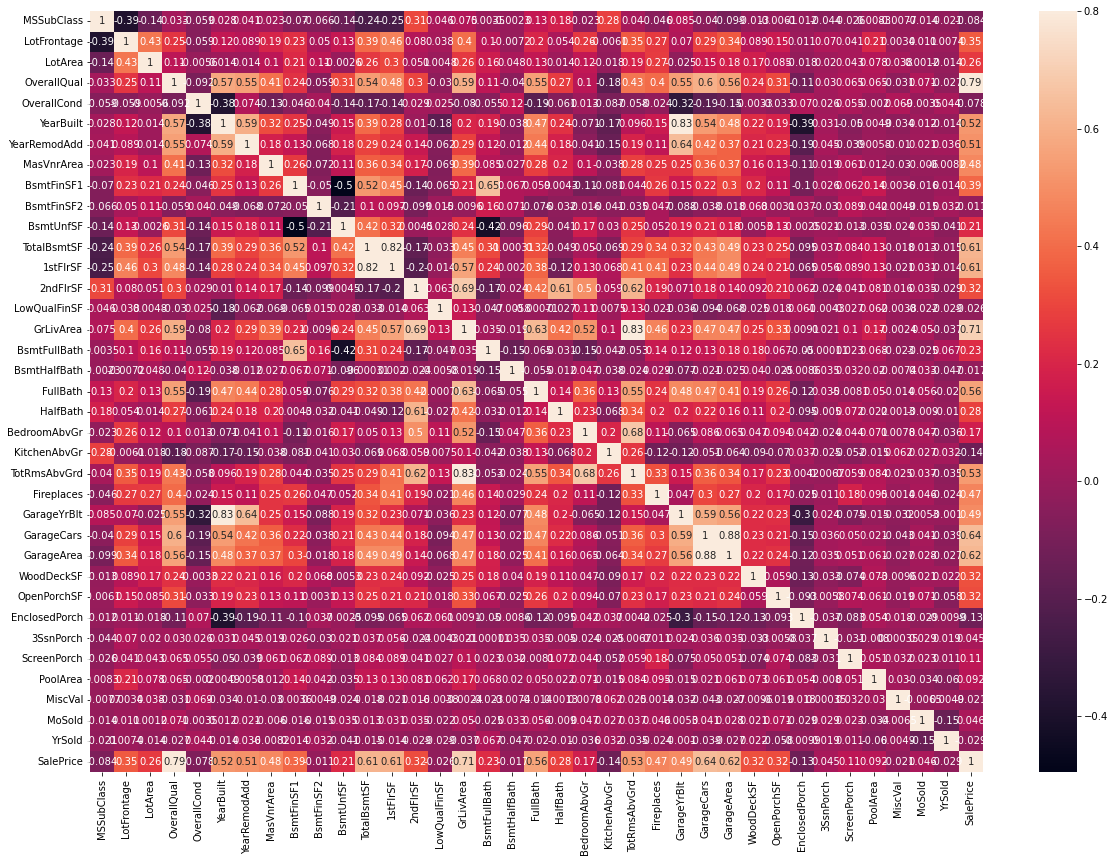

In [8]:
corrmat = train_raw.corr()
f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(corrmat, vmax=.8, annot=True);

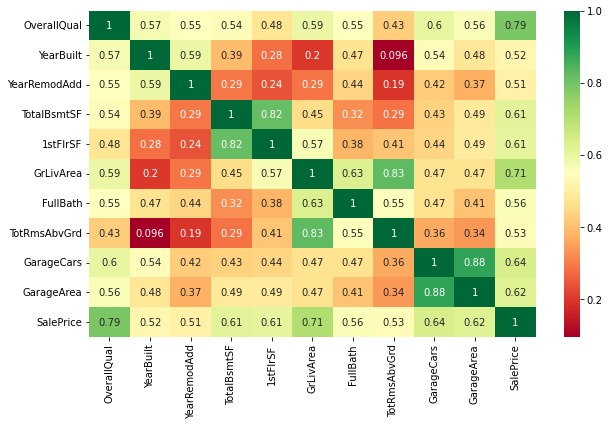

In [9]:
# most correlated features
corrmat = train_raw.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,6))
g = sns.heatmap(train_raw[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Check Response Normality and do Transformation


 mu = 180921.20 and sigma = 79415.29



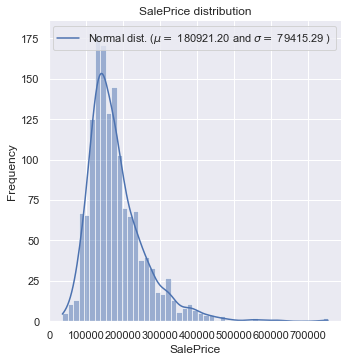

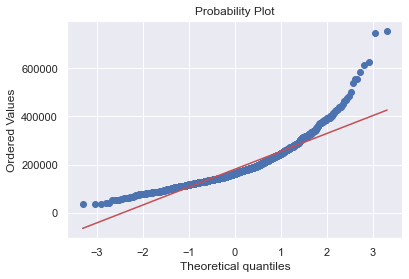

In [149]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.displot(train_raw['SalePrice'], kde=True);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_raw['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()

In [150]:
train_raw.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]


 mu = 180921.1959 and sigma = 79415.2919



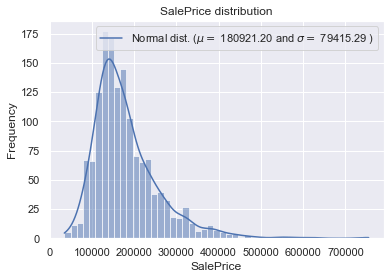

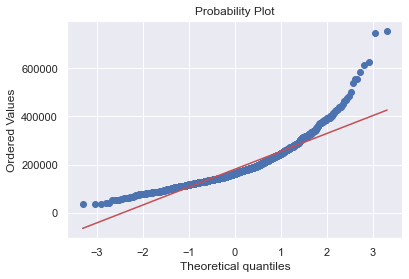

In [151]:

#Check the new distribution 
sns.histplot(train_raw['SalePrice'], kde=True);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_raw['SalePrice'])
print( '\n mu = {:.4f} and sigma = {:.4f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_raw['SalePrice'], plot=plt)
plt.show()

### Missing Data 

In [152]:
def getMissingData(train):
    all_data_na = (train.isnull().sum() / len(train)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    all_data_na_dtypes = [train[dt].dtype for dt in all_data_na.index]
    nuniques = train[all_data_na.index].nunique()
    missing_data = pd.DataFrame({'Dtypes': all_data_na_dtypes,
                                 'Missing Ratio' : all_data_na,
                                 'Unique Value Numbers': nuniques })
    if missing_data.shape[0] == 0:
        return("no missing vlaue")
    return(missing_data)

def getColInfo(train, dtype=None, cardinality_threshold=0):
    train_dtypes = [train[dt].dtype for dt in train.columns]
    nuniques = [train[col].nunique() for col in train.columns]
    res = pd.DataFrame({'Columns Names': train.columns,
                                 'Dtypes': train_dtypes,
                                 'Unique Value Numbers': nuniques })
    if dtype != None:
        res = res.loc[res['Dtypes']==dtype]
    res = pd.DataFrame(res.loc[res['Unique Value Numbers'] >= cardinality_threshold])
    return(res.sort_values(by=['Unique Value Numbers'], axis=0))
    

In [153]:
missing_data = getMissingData(X_train)

Drop all the columns if their missing ratio is greater than 5%.

### drop columns

In [181]:
# columns need to be dropped
# columns that missing ratio greater than threshold are drpped (%)
col_drop_threshold = 5

cols_dropped = missing_data.index[missing_data['Missing Ratio'] > col_drop_threshold]
cols_dropped = list(cols_dropped)
cols_dropped.append('Utilities')

Notice that column "Utilities" only have 1 kind of value and it does not have missing value thus it is dropped.

In [182]:
# columns survived
cols_survived = X_train.columns.drop(cols_dropped)
cols_survived

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
      

## Drop columns for train, valid and test

In [183]:
X_train.drop(cols_dropped, axis=1, inplace=True)
X_valid.drop(cols_dropped, axis=1, inplace=True) 
test_raw.drop(cols_dropped, axis=1, inplace=True) 

### Impute Missing Values

In [157]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [184]:
df_imp = DataFrameImputer()
X_train = df_imp.fit_transform(X_train)
X_valid = df_imp.transform(X_valid)
test_raw = df_imp.transform(test_raw)

### One Hot Encoder

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [160]:
# split categorical and numerical variables from cols_survived
X_train_encoded = X_train.copy()
X_train_survived = X_train_encoded[cols_survived]

# categorical column names
cat_cols_survived = list(X_train_survived.columns[X_train_survived.dtypes == 'object'])

# numerical column names
#num_cols_survived = list(set(X_train_survived) - set(cat_cols_survived))

In [185]:
# valid 
X_valid_encoded = X_valid.copy()
X_valid_survived = X_valid_encoded[cols_survived]

In [161]:
# encode for train
oe = OneHotEncoder(sparse=False)
train_categorical_encoded = pd.DataFrame(oe.fit_transform(X_train_encoded[cat_cols_survived]))
train_categorical_encoded.columns = oe.get_feature_names_out()

In [186]:
# encode for valid
valid_categorical_encoded = pd.DataFrame(oe.transform(X_valid_encoded[cat_cols_survived]))

ValueError: Found unknown categories ['Sev'] in column 29 during transform

In [162]:
# drop original categorical columns
X_train_encoded.drop(cat_cols_survived, axis=1, inplace=True)

In [163]:
# drop original columns for valid and test 
X_valid.drop(cat_cols_survived, axis=1, inplace=True)

In [164]:
# concat the one hot encoded columns
# reset index before concat 
X_train_encoded.reset_index(drop=True, inplace=True)
train_categorical_encoded.reset_index(drop=True, inplace=True)
X_train_well = pd.concat([X_train_encoded, train_categorical_encoded], axis=1)

(146, 34)

In [169]:
valid_categorical_encoded = pd.DataFrame(oe.transform(X_valid[cat_cols_survived]))

KeyError: "None of [Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',\n       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\n       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',\n       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',\n       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',\n       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',\n       'PavedDrive', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [165]:
# for valid and test
valid_categorical_encoded = pd.DataFrame(oe.transform(X_valid[cat_cols_survived]))
X_valid.columns = oe.get_feature_names_out()
X_valid.reset_index(drop=True, inplace=True)
X_valid = pd.concat([X_valid, valid_categorical_encoded], axis=1)

KeyError: "None of [Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',\n       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\n       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',\n       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',\n       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',\n       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',\n       'PavedDrive', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

NameError: name 'valid_categorical_encoded' is not defined

### Tuning by GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV
# train the model
SEED = 2021
random_forest_tuning = RandomForestRegressor(random_state = SEED)
param_grid = {
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,12],
    'criterion' : ['squared_error'],
    'min_samples_leaf': [5,10,20],
    'oob_score': [True],
    'random_state': [SEED]}

GSCV = GridSearchCV(estimator=random_forest_tuning, scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
GSCV.fit(X_train_well.values, y_train.values)
GSCV.best_params_ 


{'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 500,
 'oob_score': True,
 'random_state': 2021}

In [123]:
GSCV.best_score_

-0.022500821676298233

### Training Error?/ OOB score

In [42]:
random_forest_training_model = RandomForestRegressor(n_estimators=500,
                                                   random_state = SEED,
                                                   max_features='auto',
                                                   max_depth=12,
                                                   min_samples_leaf=5,
                                                   criterion='squared_error',
                                                   oob_score=True
                                                   )


In [129]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train_well.values)
    rmse= np.sqrt(-cross_val_score(model, X_train_well.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [133]:
rmsle_cv(random_forest_training_model)

array([0.17137381, 0.13341715, 0.14408406, 0.15914262, 0.13873861])

In [43]:
random_forest_training_model.fit(train_X, train_Y)

NameError: name 'train_X' is not defined

In [44]:
random_forest_training_model.oob_score_

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

### Test

In [45]:
test_pruned.shape

NameError: name 'test_pruned' is not defined

In [46]:
## process the test data

## 0. drop columns in test set
test_pruned = test_raw.drop(column_dropped, axis=1)

## trandsform predicted values 

NameError: name 'column_dropped' is not defined

In [47]:
getMissingData(test_pruned)

NameError: name 'test_pruned' is not defined

In [48]:
## 1. fill na 
test_imputed = test_pruned.copy()

columns_imputed = {
    "BsmtCond": test_imputed['BsmtCond'].mode()[0],
    "BsmtExposure": test_imputed['BsmtExposure'].mode()[0],
    "BsmtFinType2": test_imputed['BsmtFinType2'].mode()[0],
    "BsmtQual": test_imputed['BsmtQual'].mode()[0],
    "BsmtFinType1": test_imputed['BsmtFinType1'].mode()[0],
    "MasVnrType": test_imputed['MasVnrType'].mode()[0],
    "MasVnrArea": test_imputed['MasVnrArea'].median(),
    "Electrical": test_imputed['Electrical'].mode()[0],
    "MSZoning": test_imputed['MSZoning'].mode()[0],
    "Utilities": test_imputed['Utilities'].mode()[0],
    "BsmtFullBath": test_imputed['BsmtFullBath'].median(),
    "BsmtHalfBath": test_imputed['BsmtFullBath'].median(),
    "Functional": test_imputed['Functional'].mode()[0],
    "Exterior2nd": test_imputed['Exterior2nd'].mode()[0],
    "Exterior1st":  test_imputed['Exterior1st'].mode()[0],
    "BsmtFinSF1":  test_imputed['BsmtFinSF1'].median(),
    "BsmtFinSF2":  test_imputed['BsmtFinSF2'].median(),
    "BsmtUnfSF":  test_imputed['BsmtUnfSF'].median(),
    "TotalBsmtSF":  test_imputed['TotalBsmtSF'].median(),
    "KitchenQual": test_imputed['KitchenQual'].mode()[0],
    "GarageCars":  test_imputed['GarageCars'].median(),
    "GarageArea":  test_imputed['GarageArea'].median(),
    "SaleType":  test_imputed['SaleType'].mode()[0] 
}

NameError: name 'test_pruned' is not defined

In [49]:
test_imputed.fillna(columns_imputed, inplace=True)

NameError: name 'test_imputed' is not defined

In [50]:
test_imputed.shape

NameError: name 'test_imputed' is not defined

In [51]:
categorical_columns_index = [x for x in train_to_numerical.columns if train_to_numerical[x].dtype == 'object']
oe = OneHotEncoder(sparse=False)
train_categorical_encoded = pd.DataFrame(oe.fit_transform(train_to_numerical[categorical_columns_index]))
train_categorical_encoded.columns = oe.get_feature_names_out()

NameError: name 'train_to_numerical' is not defined

In [52]:
## 2. convert category to numerical
test_encoded = test_imputed.copy()

# split into categorical and numerical data
test_cate_encoded = test_encoded[categorical_columns_index]
test_nume_encoded = test_encoded.drop(categorical_columns_index, axis=1)

test_nume_encoded_columns = list(test_nume_encoded.columns)

# convert
test_cate_encoded_df = pd.DataFrame(oe.transform(test_cate_encoded))
test_cate_encoded_df_columns = list(oe.get_feature_names_out())

# reset index
nrows_test = test_encoded.shape[0]
test_cate_encoded_df.set_index(pd.Series(range(1,nrows_test+1)), inplace=True)

# concat numerical and categorical into one test set
test_cate_encoded_df.reset_index(drop=True, inplace=True)
test_nume_encoded.reset_index(drop=True, inplace=True)

test_encoded_well = pd.concat([test_cate_encoded_df, test_nume_encoded], ignore_index=True, axis=1)
test_encoded_well.columns = test_nume_encoded_columns + test_cate_encoded_df_columns

NameError: name 'test_imputed' is not defined

In [53]:
test_encoded_well.shape

NameError: name 'test_encoded_well' is not defined

In [54]:
## 3. predict
test_pred = random_forest_training_model.predict(test_encoded_well)


NameError: name 'test_encoded_well' is not defined

In [55]:
# define transform function for y
def trans_Y(Y):
    return([math.exp(1)**y - 1 for y in Y ])

In [56]:
test_pred_trans = trans_Y(test_pred)

NameError: name 'test_pred' is not defined

In [459]:
test_id = test_raw.index

#### Save test predictions to file

In [461]:

output = pd.DataFrame({'Id': test_id,
                       'SalePrice': test_pred_trans})
output.to_csv('submission.csv', index=False)